## PCA

In the last notebooks we cleaned the data and removed correlated and outlier columns.  
In this notebook we will try to reduce the dimensionality of the data even more using PCA.  

In [1]:
import pandas as pd
import math

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
clean_df = pd.read_csv('data/dataframes/df_after_cols_reduction.csv').iloc[:,1:]

cat_cols = ['company_name','company_about', 'founded', 'business model','employees','product stage','status','funding stage','succeeded']
num_cols = ['total_raised','total_rounds', 'investors','ipo_price', 'geo_market_per']
tag_cols = [col for col in clean_df.columns if col.startswith('tag_')]
targetmarket_cols = [col for col in clean_df.columns if col.startswith('targetmarket_')]
sector_list = [col for col in clean_df.columns if col.startswith("sector_")]
target_ind_list = [col for col in clean_df.columns if col.startswith("industry_")]
technology_list = [col for col in clean_df.columns if col.startswith("technology_")]

bin_cols = tag_cols + targetmarket_cols + sector_list + target_ind_list + technology_list
print(f'Data shape: {clean_df.shape}')

Data shape: (10070, 1927)


In [3]:
print("Number of categorical and numerical columns: ", len(cat_cols) + len(num_cols))
print("Number of binary columns: ", len(bin_cols))


Number of categorical and numerical columns:  14
Number of binary columns:  1913


Besided 14 categorical and numerical columns, we see there are 1913 binary columns in our data.  
We can divide the binary columns into 5 groups as before:  
<li> The company's tags columns.</li>
<li> The company's target markets columns.</li>
<li> The company's sectors columns.</li>
<li> The company's target industries columns.</li>
<li> The company's used technologies columns.</li>

For each column group, we will use PCA algorithm to reduce the dimention to 2, And we will add the new x,y columns to the non-binary data:

In [4]:
pca_df = clean_df[cat_cols + num_cols].copy()
cols_dic = {'tag_cols':tag_cols, 'targetmarket_cols':targetmarket_cols, 'sector_list':sector_list, 'target_ind_list':target_ind_list, 'technology_list':technology_list, 'bin_cols':bin_cols} 

print(f"Size before adding PCA cols: {pca_df.shape}")
pca_cols = []
for key, value in cols_dic.items():
    pca = pd.DataFrame(PCA(n_components=2).fit_transform(clean_df[value]), columns = ['x','y'])
    
    pca_df[f'{key}_x'] = list(pca['x'])
    pca_df[f'{key}_y'] = list(pca['y'])
    
    pca_cols.append((f'{key}_x',f'{key}_y'))

print(f"Size after adding PCA cols: {pca_df.shape}")

Size before adding PCA cols: (10070, 14)
Size after adding PCA cols: (10070, 26)


The dataframe now consists of all categorical and numerical columns, and 12 more columns:  
2 columns for each of the 5 groups of binary columns + 2 columns generated by PCA algorithm from all binary cols.

We will plot the data now for each column group:

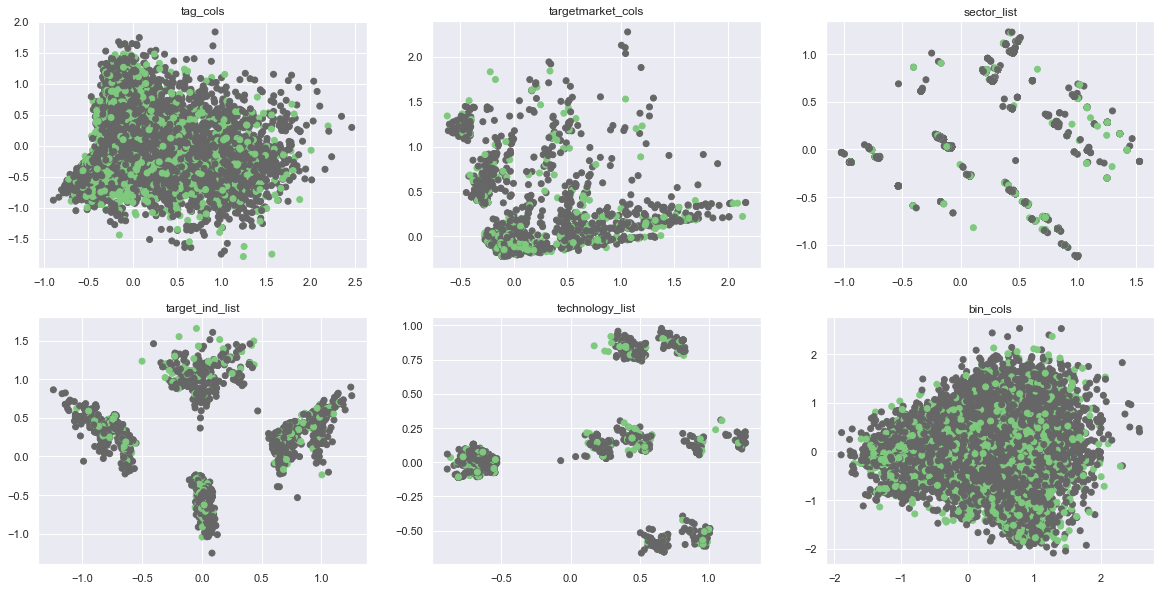

In [5]:
number_of_plot_cols = 3
if len(cols_dic) % 3 == 0:
    number_of_plot_rows = int(len(cols_dic) / 3)
else:
    number_of_plot_rows = int(math.floor(len(cols_dic) / 3) + 1)

fig, axes = plt.subplots(number_of_plot_rows,number_of_plot_cols, figsize=(20,10))

k = 0
for i in range(number_of_plot_rows):
    for j in range(number_of_plot_cols):

        if k >= len(cols_dic):
            break
        
        axes[i,j].scatter(pca_df[pca_cols[k][0]], pca_df[pca_cols[k][1]], c=clean_df['succeeded'], cmap='Accent')
        axes[i,j].set_title(list(cols_dic.keys())[k])
        k += 1

plt.show()

We see some groups can be devided into smaller groups.  
But from first glance, we can't see any relationship between the groups to the success of the company.    

In [6]:
pca_df.to_csv('data/dataframes/pca_2d_df.csv')

# (Extra) 3D graphs

If we reduce the dimensionality of the data to 3, we can get a 3D visualization,  
We will use plotly library to plot the 3D graphs: [Plotly Express](https://plotly.com/python/plotly-express/).

In [7]:
import plotly.express as px

In [8]:
pca_df = clean_df[cat_cols + num_cols].copy()
cols_dic = {'tag_cols':tag_cols, 'targetmarket_cols':targetmarket_cols, 'sector_list':sector_list, 'industry_list':target_ind_list, 'technology_list':technology_list, 'bin_cols':bin_cols} 

print(f"Size before adding PCA cols: {pca_df.shape}")
pca_cols_3d = []
for key, value in cols_dic.items():
    pca = pd.DataFrame(PCA(n_components=3).fit_transform(clean_df[value]), columns = ['x','y','z'])
    
    pca_df[f'{key}_x'] = list(pca['x'])
    pca_df[f'{key}_y'] = list(pca['y'])
    pca_df[f'{key}_z'] = list(pca['z'])
    
    pca_cols_3d.append([f'{key}_x',f'{key}_y',f'{key}_z'])

print(f"Size after adding PCA cols: {pca_df.shape}")

Size before adding PCA cols: (10070, 14)
Size after adding PCA cols: (10070, 32)


In [9]:
for coord in pca_cols_3d:
    fig = px.scatter_3d(pca_df, x=coord[0], y=coord[1], z=coord[2], color='succeeded')
    fig.show()


In [10]:
pca_df.to_csv('data/dataframes/pca_3d_df.csv')

Now that we have both binary and pca dataframes, we can try to plot some visualizations.


We can show a breakdown of the companies by some of their properties:

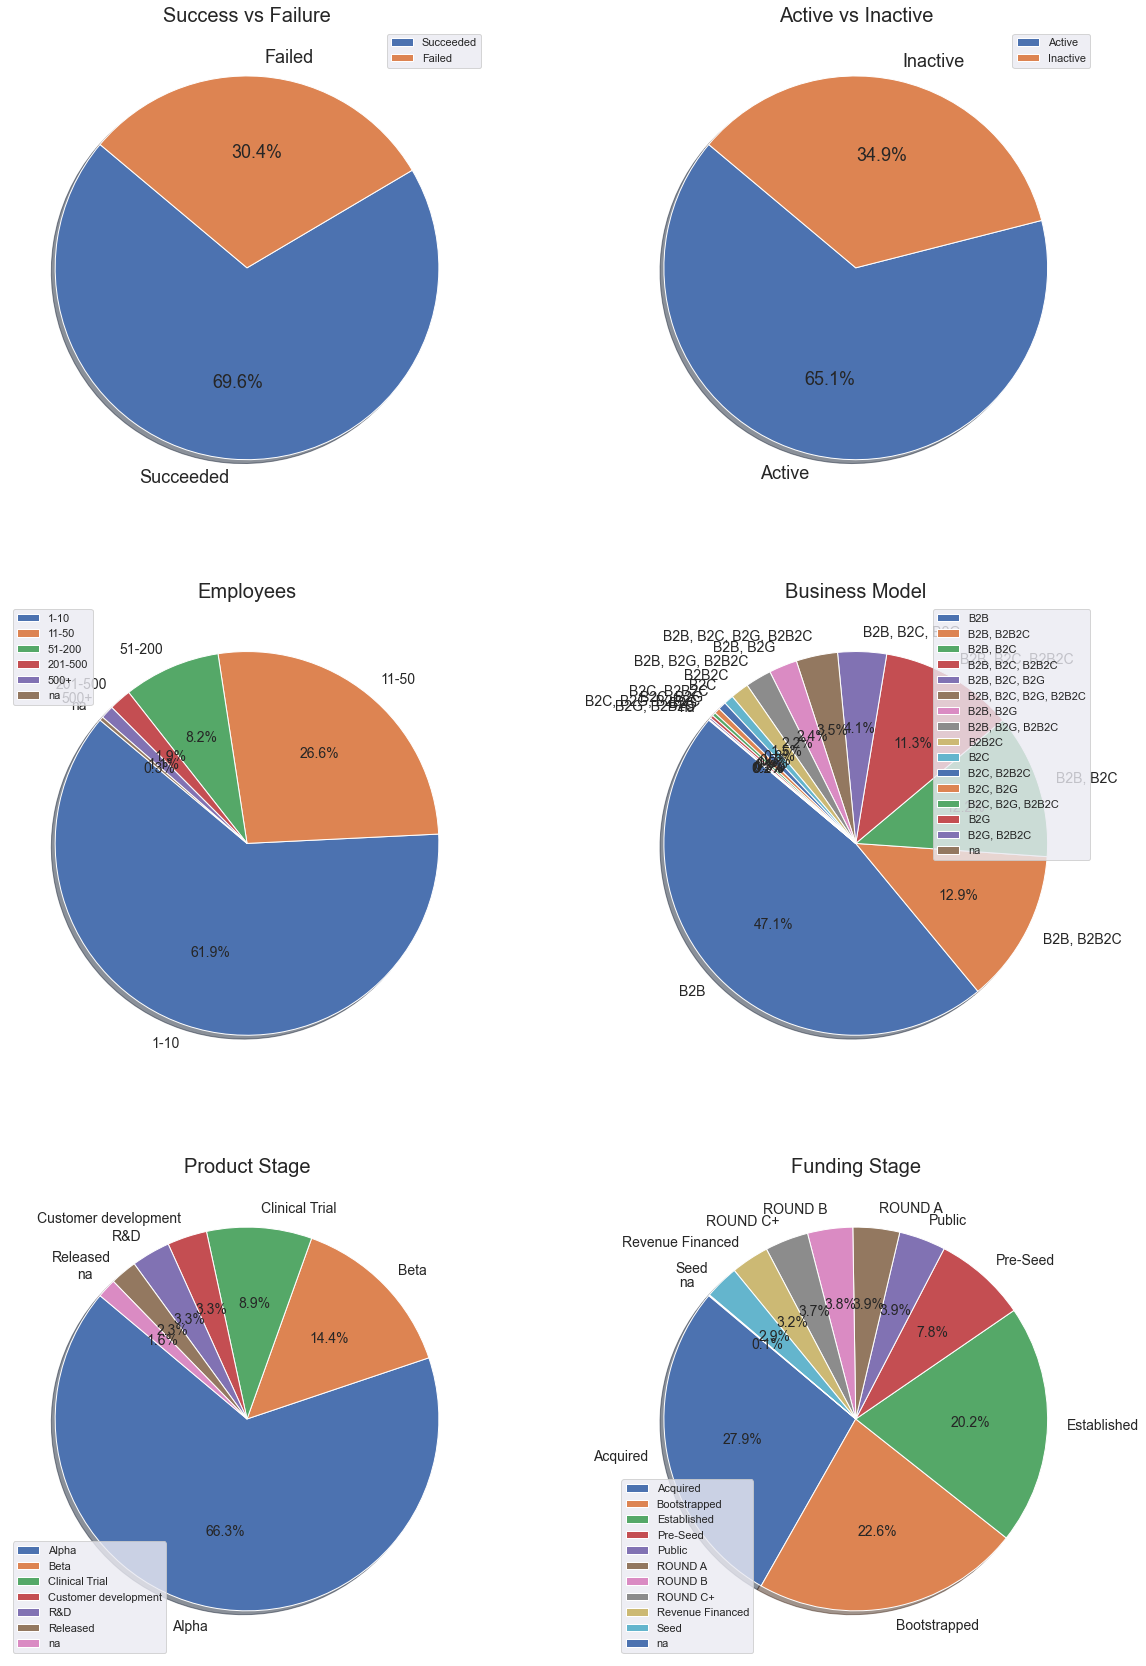

In [11]:
success_label = ['Succeeded', 'Failed']
business_model_labels = ['B2B', 'B2B, B2B2C', 'B2B, B2C', 'B2B, B2C, B2B2C', 'B2B, B2C, B2G',
 'B2B, B2C, B2G, B2B2C', 'B2B, B2G', 'B2B, B2G, B2B2C', 'B2B2C', 'B2C',
 'B2C, B2B2C', 'B2C, B2G', 'B2C, B2G, B2B2C', 'B2G', 'B2G, B2B2C', 'na']
product_stage_labels = ['Alpha', 'Beta', 'Clinical Trial', 'Customer development', 'R&D', 'Released', 'na']
funding_stage_labels = ['Acquired', 'Bootstrapped', 'Established', 'Pre-Seed', 'Public', 'ROUND A', 'ROUND B', 'ROUND C+', 'Revenue Financed', 'Seed', 'na']
employees_lable = ['1-10', '11-50', '51-200', '201-500', '500+', 'na']

def plot_pie(axe,data,labels,title, fontsize = 14):
    axe.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': fontsize})
    axe.set_title(title, fontsize=20)
    axe.legend(labels, loc='best')
    return axe


fig, axes = plt.subplots(3,2, figsize=(20,30))

axes[0,0] = plot_pie(axes[0,0], pca_df['succeeded'].value_counts().values, success_label, 'Success vs Failure', 18)
axes[0,1] = plot_pie(axes[0,1], pca_df['status'].value_counts().values, ['Active','Inactive'], 'Active vs Inactive', 18)
axes[1,0] = plot_pie(axes[1,0], pca_df['employees'].value_counts().values, employees_lable, 'Employees')
axes[1,1] = plot_pie(axes[1,1], pca_df['business model'].value_counts().values, business_model_labels, 'Business Model')
axes[2,0] = plot_pie(axes[2,0], pca_df['product stage'].value_counts().values, product_stage_labels, 'Product Stage')
axes[2,1] = plot_pie(axes[2,1], pca_df['funding stage'].value_counts().values, funding_stage_labels, 'Funding Stage')




We can also see the success rate by the years:

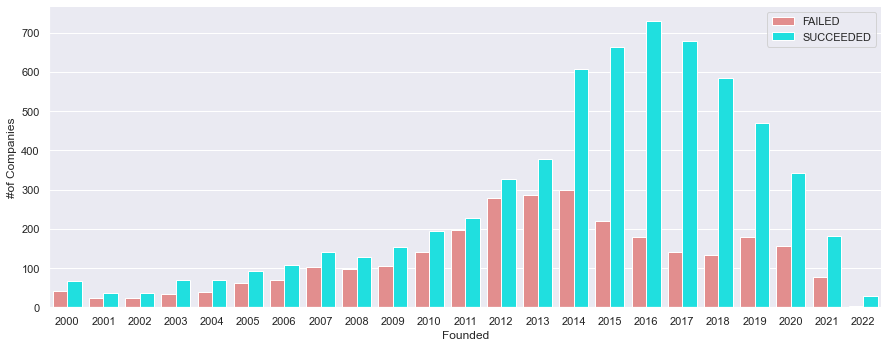

In [39]:
g = sns.catplot(
    x='founded', 
    data=pca_df[pca_df.founded >= 2000],
    kind='count', 
    hue='succeeded',
    palette=["lightcoral", "cyan"], 
    height=5, 
    aspect=2.5,
    legend=False,
    ).set_axis_labels('Founded', '#of Companies')
g.ax.legend(labels=['FAILED', 'SUCCEEDED'])

In the above bar plot, we see all the companies founded since year 2000 grouped by founded year.  
We can see that the amount of start-ups has been increasing rapidly in the last few years, with a peak year being 2016,  
And we see the success rate is increasing as well.  
The exeption is during the last 2 years, our guess is COVID-19.

In this notebook we took the big dataframe with over 1900 binary columns, and reduced its dimensionality to 2 using PCA algorithm.  
We also plotted some interegsting graphs using Plotly library.   
For the next and final notebook, we will use supervised learning algorithms on all the datasets - the binary and both PCA dataframes.  
Next notebook: [Supervised Learning](supervised.ipynb)